Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
%matplotlib inline

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

Below is the scatter plot of birth weight vs mother's age.

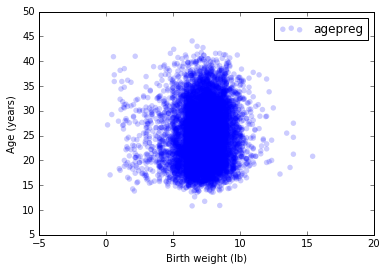

In [2]:
import nsfg
import thinkplot
df = nsfg.ReadFemPreg()

weights = df.totalwgt_lb
agepreg = df.agepreg

thinkplot.Scatter(weights, agepreg)
thinkplot.Show(xlabel='Birth weight (lb)', ylabel='Age (years)')

There does not appear to be a clear relationship between birth weight and mother's age from this scatter plot.

Below is a plot of the percentiles of birth weight vs. mother's age.

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


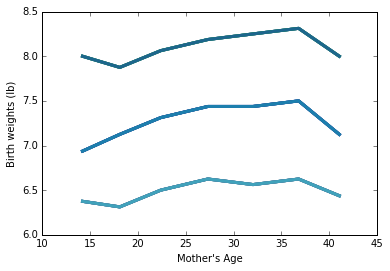

In [3]:
import numpy as np
import thinkstats2

df = df.dropna(subset=['agepreg', 'totalwgt_lb'])
bins = np.arange(5, 50, 5)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)

for i, group in groups:
    ages = [group.agepreg.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
    
    for percent in [75, 50, 25]:
            weights = [cdf.Percentile(percent) for cdf in cdfs]
            label = '%dth' % percent
            thinkplot.Plot(ages, weights)

thinkplot.Show(xlabel="Mother's Age", ylabel='Birth weights (lb)')


In the plot above, the top line is the 75th percentile, the middle line is the 50th percentile, and the last line is the 25th percentile for birth weight. What we see here is that in the 10 bins we created for the mother's age, the birth weight of the baby by percentile can occur at all ages. That is to say, other than the dip after 40 that occurs in all percentiles, the age of the mother does not contribute to the birth weight of the baby as we see a flat line for all three percentiles along the age axis.

Below is the calculated Pearson's correlation.

In [4]:
print thinkstats2.Corr(df.totalwgt_lb, df.agepreg)

0.0688339703541


The Pearson's correlation is very close to 0 which implies that there is no relationship between these variables. However, Pearson's correlation only measures linear relationships so it could be the case that there is a nonlinear relationship. In addition, Pearson's correlation is not robust to the presence of outliers and skewed distributions so this could also be the cause of the calculated correlation being close to 0.

Below is the calculated Spearman's correlation.

In [5]:
print thinkstats2.SpearmanCorr(df.totalwgt_lb, df.agepreg)

0.0946100410966


Spearman's correlation is a value that is also very close to 0 but is 0.03 higher than the Pearson's correlation. Since Spearman's correlation is robust to the presence of outliers and skewed distributions, we could attribute the difference between the correlations to these factors. This value is also close to 0 so it would appear that these variables are not correlated or are only very slightly positively correlated.

Given the calculation of the Pearson's and Spearman's correlations, the percentile plot, and the scatter plot, I do not think there is a relationship between the mother's age and the baby's birth weight.